In [ ]:
!pip install setuptools==65.5.0 "wheel<0.40.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.0
    Uninstalling wheel-0.41.0:
      Successfully uninstalled wheel-0.41.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


In [ ]:
!pip install d2l==1.0.0b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616796 sha256=a66d94f2e05542ca5d763ee4a4aa8cd8381c26cdf7174ea50861591df8bdde42
  Stored in directory: /root/.cache/pip/wheels/81/aa/90/b67df76370d3916a2189b662cf48da38ce41a4e7e58b6abff5
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully 

In [ ]:
!pip install matplotlib_inline==0.1.1

  Attempting uninstall: matplotlib_inline
    Found existing installation: matplotlib-inline 0.1.6
    Uninstalling matplotlib-inline-0.1.6:
      Successfully uninstalled matplotlib-inline-0.1.6


In [ ]:
import torch
import numpy as np
import scipy.io as sio
from torch import nn
from torch.utils import data
from d2l import torch as d2l

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the .mat file
mat_train = sio.loadmat('/content/drive/Shareddrives/PhD - Jiaxiang/Codes/Probabilistic crack/crack-liang/neural networks/Flextural_Crack_Train.mat')
mat_test = sio.loadmat('/content/drive/Shareddrives/PhD - Jiaxiang/Codes/Probabilistic crack/crack-liang/neural networks/Flextural_Crack_Validation.mat')

In [ ]:
# Read data
features_train = torch.from_numpy(np.transpose(mat_train['XTrain'])).float()
labels_train = torch.from_numpy(np.transpose(mat_train['YTrain'])).float()
features_test = torch.from_numpy(np.transpose(mat_test['XValidation'])).float()
labels_test = torch.from_numpy(np.transpose(mat_test['YValidation'])).float()

In [ ]:
# Load data
batch_size = 128
def load_array(data_arrays, batch_size, is_train=True, num_workers=2):
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train, num_workers=num_workers)

train_iter = load_array((features_train, labels_train), batch_size)
test_iter = load_array((features_test, labels_test), batch_size, is_train=False)

In [ ]:
# Network achitechure
net = nn.Sequential(nn.Linear(3024, 2624),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.Linear(2624,2248),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.Linear(2248,1848),
                    nn.ReLU(),
                    nn.Dropout(p=0.5),
                    nn.Linear(1848, 1406)
                    )
 #initialize parameters
def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)

Sequential(
  (0): Linear(in_features=3024, out_features=2624, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=2624, out_features=2248, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=2248, out_features=1848, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=1848, out_features=1406, bias=True)
)

In [ ]:
# load pre trained model
# net_save_name = '2randomcracks.pth'
# path = F"/content/drive/Shareddrives/PhD - Jiaxiang/Codes/Probabilistic crack/crack-liang/neural networks/{net_save_name}"
# net.load_state_dict(torch.load(path))

In [ ]:
def evaluate_loss_gpu(net, data_iter, loss, device=None):
    """compute loss on dataset using GPU"""
    if isinstance(net, nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    total_loss=0
    with torch.no_grad():
        for X, y in data_iter:
                X = X.to(device)
                y = y.to(device)
                l = loss(net(X), y)
                total_loss += l.item() * X.size(0)  # Multiply by batch size
    return total_loss / len(data_iter.dataset)

In [ ]:
def l2_penalty():
  'Replace pow(2) with abs() for L1 regularization, not recommended'
  return sum(p.pow(2).sum() for p in net.parameters())

In [ ]:
# Training
def train_regression(net, train_iter, test_iter, num_epochs, lr, lambd, device):
    """Using GPU to train a regression model"""
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = nn.MSELoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        # total loss，total number of samples
        net.train()
        for X, y in train_iter:
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y) + lambd * l2_penalty()
            l.backward()
            optimizer.step()
        if epoch == 0 or (epoch + 1) % 10 == 0:
          train_l = evaluate_loss_gpu(net, train_iter, loss)
          test_l  = evaluate_loss_gpu(net, test_iter, loss)
          print(f'train loss {train_l:.3f}, '
                f'test loss {test_l:.3f}')
          animator.add(epoch + 1, (train_l, test_l))

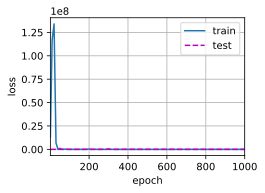

In [ ]:
lr, num_epochs, lambd = 0.001, 1000, 0
train_regression(net, train_iter, test_iter, num_epochs, lr, lambd, d2l.try_gpu())

In [ ]:
# Save the model
# net_save_name = '2randomcracks.pth'
# path = F"/content/drive/Shareddrives/PhD - Jiaxiang/Codes/Probabilistic crack/crack-liang/neural networks/{net_save_name}"
# torch.save(net.state_dict(), path)